<a href="https://colab.research.google.com/github/09jainayush/ML-Projects/blob/main/ONLINE_CYBERBULLYING_DETECTION_USING_DT_CNN_BERT/ONLINE_CYBERBULLYING_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1=pd.read_csv("/content/ONLINE_CYBERBULYING.csv")

In [ ]:
df1.shape

(24783, 2)

In [ ]:
df1.head()

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      24783 non-null  object
 1   full_text  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [ ]:
df1.isnull().sum()

label        0
full_text    0
dtype: int64

In [ ]:
unique_values, counts = np.unique(df1["label"], return_counts=True)

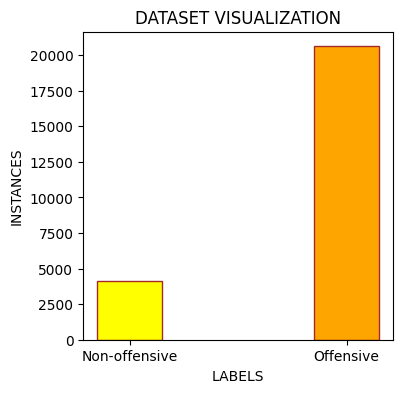

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
c=["yellow", "orange"]
plt.bar(unique_values, counts, color=c, edgecolor="brown", width=0.3)
plt.ylabel("INSTANCES")
plt.xlabel("LABELS")
plt.title("DATASET VISUALIZATION")
plt.show()

In [ ]:
import re
import string

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword=set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def pretext(text):
  text=str(text).lower()
  text=re.sub("\[.*?\]", "", text)
  text=re.sub("https?://\S+|www\.\S+", "", text)
  text=re.sub("<,*?>+", "", text)
  text=re.sub("[%s]" %re.escape(string.punctuation), "", text)
  text=re.sub("\n", "", text)
  text=re.sub("\w*\d\w*", "", text)

  text=[word for word in text.split() if word not in stopword]
  text=" ".join(text)

  text=[stemmer.stem(word) for word in text.split()]
  text=" ".join(text)

  return text

In [ ]:
df1["full_text"]=df1["full_text"].apply(pretext)

In [ ]:
df1['label'] = df1['label'].map({'Offensive': 1, 'Non-offensive': 0})

In [ ]:
df1.head()

,label,full_text
0,0,rt mayasolov woman shouldnt complain clean hou...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe place
2,1,rt urkindofbrand dawg rt ever fuck bitch start...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might fa...


**DECISION TREE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x=np.array(df1["full_text"])
y=np.array(df1["label"])

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_acc=[]
test_acc=[]
models=["DECISION TREE", "CNN", "BERT"]

In [ ]:
from sklearn.metrics import accuracy_score
x_train_pred=dt.predict(x_train)
x_test_pred=dt.predict(x_test)

print("Training Accuracy: ", accuracy_score(x_train_pred, y_train))
print("Testing Accuracy: ", accuracy_score(x_test_pred, y_test))

train_acc.append(accuracy_score(x_train_pred, y_train))
test_acc.append(accuracy_score(x_test_pred, y_test))

Training Accuracy:  0.9997694258704174
Testing Accuracy:  0.9379959650302623


In [ ]:
data=input()
pred=cv.transform([data]).toarray()
pred=dt.predict(pred)
if pred[0]==1:
  print("Offensive")
else:
  print("Non-Offensive")

Hate
Offensive


**CNN**

In [ ]:
import tensorflow as tf

In [ ]:
# Vectorize the dataset
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df1["full_text"])
sequences = tokenizer.texts_to_sequences(df1["full_text"])
x = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=256)
y = df1["label"]

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Define the CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 128, input_length=256),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the CNN model
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

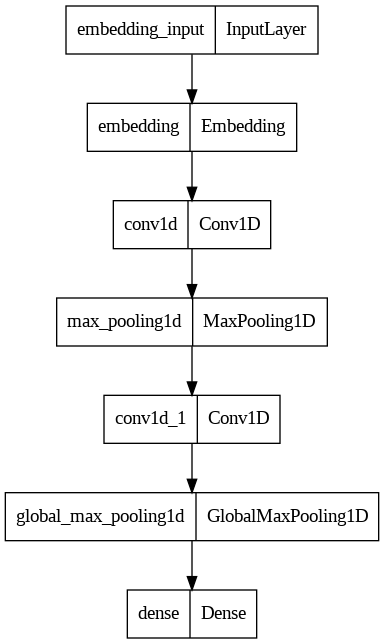

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model)

In [ ]:
# Train the CNN model
cnn_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
543/543 [==============================] - 17s 22ms/step - loss: 0.1846 - accuracy: 0.9170
Epoch 2/5
543/543 [==============================] - 4s 7ms/step - loss: 0.0712 - accuracy: 0.9752
Epoch 3/5
543/543 [==============================] - 4s 7ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 4/5
543/543 [==============================] - 4s 7ms/step - loss: 0.0068 - accuracy: 0.9975
Epoch 5/5
543/543 [==============================] - 3s 6ms/step - loss: 0.0038 - accuracy: 0.9988


In [ ]:
# Extract features from the CNN model
x_train_pred = cnn_model.predict(x_train)
x_test_pred = cnn_model.predict(x_test)

233/233 [==============================] - 1s 2ms/step


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
print("Training Accuracy: ", 1-(mean_squared_error(x_train_pred, y_train)))
print("Testing Accuracy: ", 1-(mean_squared_error(x_test_pred, y_test)))

train_acc.append(1-(mean_squared_error(x_train_pred, y_train)))
test_acc.append(1-(mean_squared_error(x_test_pred, y_test)))

Training Accuracy:  0.9995515603130793
Testing Accuracy:  0.9438084947746879


In [ ]:
data=input()

Hate


In [ ]:
# Check if the input text is a single word
if len(data.split()) == 1:
  # Add the word to the tokenizer vocabulary
  tokenizer.word_index[data] = len(tokenizer.word_index) + 1

In [ ]:
# Vectorize the input texts
sequences = tokenizer.texts_to_sequences(data)
x_out = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=256)

In [ ]:
# Extract features from the CNN model
predictions = cnn_model.predict(x_out)

1/1 [==============================] - 0s 18ms/step


In [ ]:
if predictions[-1]>=0.5:
  print("Offensive")
else:
  print("Non-Offensive")

Offensive


**BERT**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(df1["full_text"], df1["label"], test_size=0.3)

In [ ]:
# Convert the data to strings
x_train = [str(x) for x in x_train]
x_test = [str(x) for x in x_test]

In [ ]:
# Tokenize the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(x_train, truncation=True, padding=True)
test_encodings = tokenizer(x_test, truncation=True, padding=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Convert the data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)

In [ ]:
# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
543/543 [==============================] - 305s 411ms/step - loss: 0.7060 - accuracy: 0.8282 - val_loss: 0.6931 - val_accuracy: 0.8316
Epoch 2/5
543/543 [==============================] - 202s 372ms/step - loss: 0.6931 - accuracy: 0.8322 - val_loss: 0.6931 - val_accuracy: 0.8316
Epoch 3/5
543/543 [==============================] - 200s 368ms/step - loss: 0.6931 - accuracy: 0.8322 - val_loss: 0.6931 - val_accuracy: 0.8316
Epoch 4/5
543/543 [==============================] - 199s 367ms/step - loss: 0.6931 - accuracy: 0.8322 - val_loss: 0.6931 - val_accuracy: 0.8316
Epoch 5/5
543/543 [==============================] - 199s 367ms/step - loss: 0.6931 - accuracy: 0.8322 - val_loss: 0.6931 - val_accuracy: 0.8316


In [ ]:
# Evaluate the model
loss1, accuracy1 = model.evaluate(train_dataset)
loss2, accuracy2 = model.evaluate(test_dataset)

# Predict on the test data
x_train_pred = model.predict(train_dataset)
x_test_pred = model.predict(test_dataset)

233/233 [==============================] - 36s 120ms/step


In [ ]:
print("Training Accuracy: ", accuracy_score(y_train, np.argmax(x_train_pred.logits, axis=1)))
print("Testing Accuracy: ", accuracy_score(y_test, np.argmax(x_test_pred.logits, axis=1)))

train_acc.append(accuracy_score(y_train, np.argmax(x_train_pred.logits, axis=1)))
test_acc.append(accuracy_score(y_test, np.argmax(x_test_pred.logits, axis=1)))

Training Accuracy:  0.8321996771962186
Testing Accuracy:  0.8316072629455279


In [ ]:
data=input()

Hate


In [ ]:
# Tokenize the input text
encoded_input = tokenizer(data, truncation=True, padding=True, return_tensors='tf')

# Make predictions
predictions = model.predict(encoded_input)

# Get the predicted labels
predicted_labels = np.argmax(predictions.logits, axis=1)

# Print the results
if predicted_labels[-1]==0:
  print("Non-Offensive")
else:
  print("Offensive")

1/1 [==============================] - 0s 48ms/step
Offensive


**VISUALIZATION**

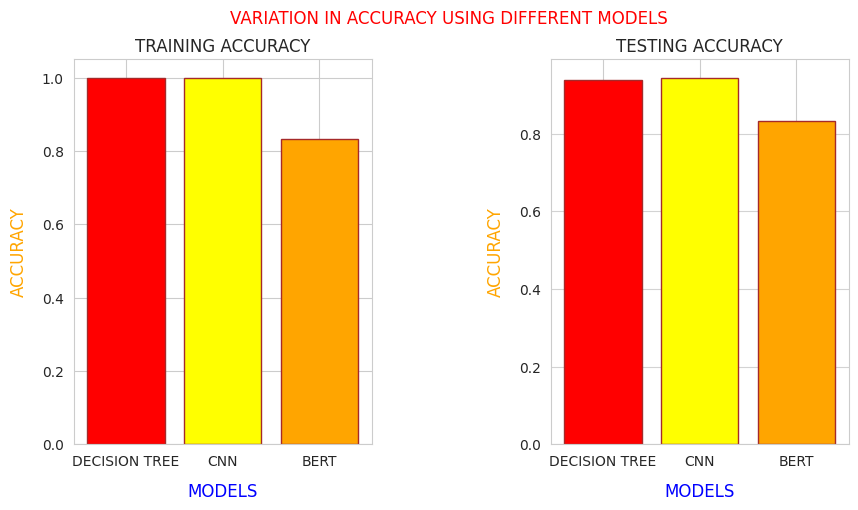

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

c=["red", "yellow", "orange"]
fig, ax=plt.subplots(1,2, figsize=(10,5)) #(width, height)

ax[0].bar(models, train_acc, color=c, edgecolor="brown")
ax[0].set_title("TRAINING ACCURACY")
ax[0].set_ylabel("ACCURACY", labelpad=10, fontsize=12, color="orange")
ax[0].set_xlabel("MODELS", labelpad=10, fontsize=12, color="blue")

ax[1].bar(models, test_acc, color=c, edgecolor="brown")
ax[1].set_title("TESTING ACCURACY")
ax[1].set_ylabel("ACCURACY", labelpad=10, fontsize=12, color="orange")
ax[1].set_xlabel("MODELS", labelpad=10, fontsize=12, color="blue")

fig.suptitle("VARIATION IN ACCURACY USING DIFFERENT MODELS", color="red")
plt.subplots_adjust(wspace=0.6)
plt.tick_params(bottom=False)
plt.grid(axis="y", color="#d3d3d3")

plt.show()